# Lektion 4a
## **Lösning av Laplace ekvationen mha numeriska "Finite difference method"** 



Två grundläggande samband för elektrostatiska fält och potentialer är

\begin{align}
\bar{E} = - \nabla V \qquad \text{och} \quad \bar{\nabla}\cdot\bar{E} = \frac{\rho}{\epsilon_0}
\end{align}

Dessa kan kombineras till en ekvation för potentialen $V$


\begin{align}
\nabla^2 V = -\frac{\rho}{\epsilon_0} \qquad \text{Poisson ekvation}
\end{align}

I många problem ligger alla laddningar på metallytor och rymdladdningstätheten är $\rho = 0$.
Potentialen i området mellan ledarna erhålles då med:

\begin{align}
\nabla^2 V &= 0 \qquad \text{Laplaces ekvation}\\
\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}+\frac{\partial^2 V}{\partial z^2} &= 0
\end{align}

Vi kan lösa *analytiskt* Laplaces ekvationen bara i begränsade antal problem, men vi kan lösa resten med **numeriska metoder**.
 
Vi kommer titta på lösningar i 2D men metoden kan lätt generaliseras till 3D. 

\begin{align}
\nabla^2 V = \frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2} = 0
\end{align}

Dem 2:a derivatorna uppskattas numeriskt med "4-punktsformeln" för Laplace ekvation:

\begin{align}
\frac{V(x_{i+1}, y_j) - 2V(x_i, y_j) + V(x_{i-1}, y_j)}{(\Delta x)^2} + \frac{V(x_i, y_{j+1}) - 2V(x_i, y_j) + V(x_i, y_{j-1})}{(\Delta y)^2} = 0 
\end{align}

Vi kan anta att $ \Delta x = \Delta y$ och kan lösa det för $V(x_i, y_j)$:

\begin{align}
V(x_i, y_j) = \frac{1}{4}(V(x_{i+1}, y_{j}) + V(x_{i-1}, y_{j}) + V(x_{i}, y_{j+1}) + V(x_{i}, y_{j-1}))
\end{align}

Mer information om "4-punktsformeln" hittar ni på Studium i en separat fil.
Sista formeln används i en iterativ procedur där $V$ "löses" på ett rutnät med lämpliga randvillkor. Idén är att $V$ kommer så småningom konvergera till den sanna lösningen.

### **Preceduren**

- #### Dela upp ytan i ett rutnät i x- och y-riktning.

  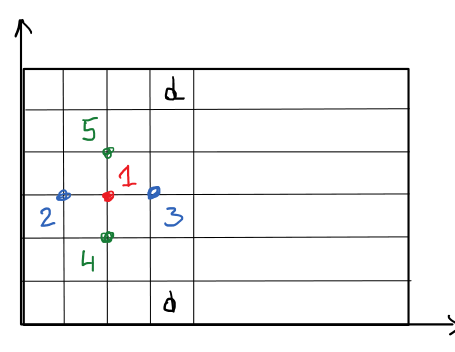
  
- #### Ansätt något startvärde för potentialen i varje ruta (kan vara t.ex. noll). Rutnäts mellanrum, $d$ är $d = \Delta x = \Delta y$ från tidigare formel.  
- #### Gå genom alla rutor och bilda i tur och ordning nya potentialvärden som är medelvärde av de 4 omgivande potentialvärdena.
- #### Efter ett antal iterationer erhålls approximativa potentialvärden i hela området.


#### Iterativa beräkningar:

\begin{align}
V_1^{(k+1)} = \frac{1}{4} \left( V_2^{(k)}+V_3^{(k)}+V_4^{(k)}+V_5^{(k)} \right), \quad k=1,2,3,...
\end{align}

#### upprepas tills konvergens kriterium uppfylls:

\begin{align}
\left\lvert V_1^{(k+1)} - V_1^{(k)} \right\rvert < \delta_V
\end{align}


---

In [12]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

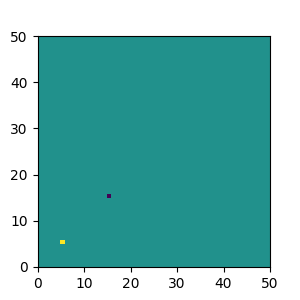

In [13]:
N = 50
V = np.zeros( (N,N) ) # förberedder tom rutnät
V[ 5,5] = 10 # 10 V
V[15,15] = -10 # -10 V
# rita enkel bild för att se att allt stämmer
fig, ax = plt.subplots(figsize=(3,3))
ax.pcolor(V)

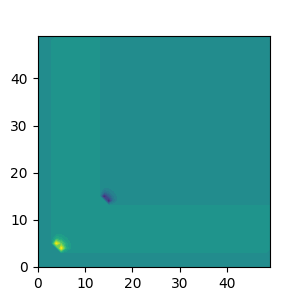

In [14]:
# uppdatera rutnät *manuelt"
for x in range(1,N-1) :
    for y in range(1,N-1) :
        V[x,y] = ( V[x-1,y] + V[x,y-1] + V[x,y+1] + V[x+1,y] )/4
            
# annat sätt att rita i 2D
X, Y = np.meshgrid(np.arange(N), np.arange(N))
fig, ax = plt.subplots(figsize=(3,3))
ax.contourf(X, Y, V, 30)

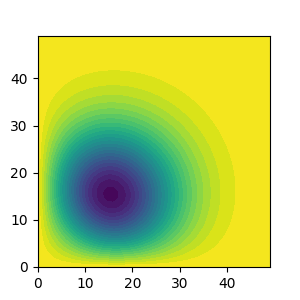

In [15]:
# uppdatera rutnät med enkel loop
for k in range(100) :
    for x in range(1,N-1) :
        for y in range(1,N-1) :
            V[x,y] = ( V[x-1,y] + V[x,y-1] + V[x,y+1] + V[x+1,y] )/4

fig, ax = plt.subplots(figsize=(3,3))
ax.contourf(X, Y, V, 30)

## Resultatet blev fel, våra ursprungliga punkter med potential 10V och -10 V är borta! Vi måste rätta till det "manuelt"

In [16]:
# omstart
N = 50
V = np.zeros( (N,N) ) # förberedder tom rutnät

def elektroder(V):
    V[ 5,5] = 10 # 10 V
    V[15,15] = -10 # -10 V

# loop
for k in range(1000) :
    V_old = V
    for x in range(1,N-1) :
        for y in range(1,N-1) :
            V[x,y] = ( V[x-1,y] + V[x,y-1] + V[x,y+1] + V[x+1,y] )/4
    elektroder(V)

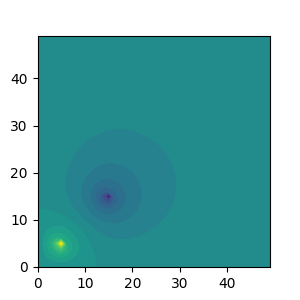

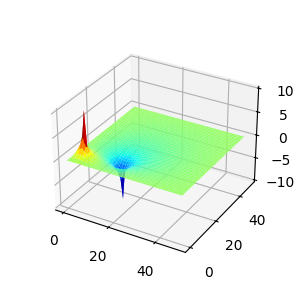

In [17]:
# Presenterapotentialen i 2D   
fig, ax = plt.subplots(figsize=(3,3))
ax.contourf(X, Y, V, 30)
# Presenterapotentialen i 3D
fig1, ax1 = plt.subplots(figsize=(3,3),subplot_kw=dict(projection='3d'))
ax1.plot_surface(X, Y, V, cmap=plt.cm.jet)

## Elektrisk fält

Kom ihåg samband för elektrostatiska fält och potentialer :

\begin{align}
\bar{E} = - \nabla V 
\end{align}

Vi behöver räkna gradient. För det kan vi använda befintliga funktion i *numpy*.


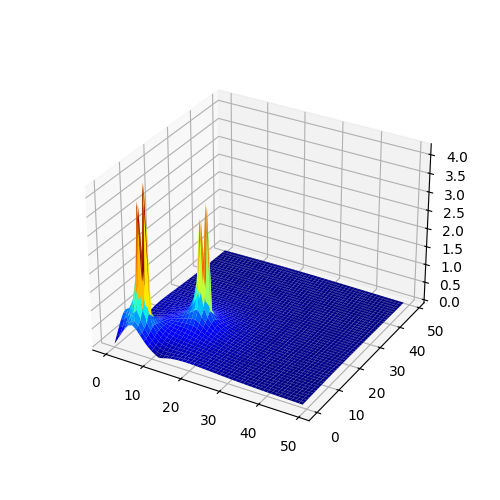

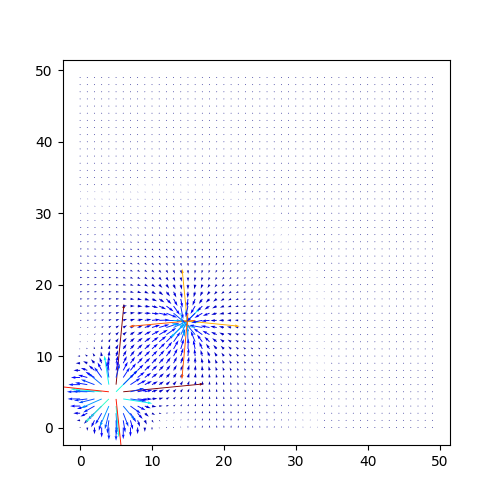

In [18]:
# Efield
(Ex, Ey) = np.gradient(-V)
Emag = np.sqrt(Ex**2 + Ey**2)
# fält styrka 
fig2, ax2 = plt.subplots(figsize=(5,5),subplot_kw=dict(projection='3d'))
ax2.plot_surface(X, Y, Emag, cmap=plt.cm.jet)
# fält linjer med quiver
fig3, ax3 = plt.subplots(figsize = (5,5))
ax3.quiver(X, Y, Ey, Ex, Emag, scale=20, cmap=plt.cm.jet)

## Vi måste tänka vad som händer på kanterna - RANDVILLKOREN 


### Dirichlet

Ett Dirichlet-randvillkor  anger bara den elektriska **potentialen** på gränsen. Till exempel, när gränsen är tillräckligt långt från laddningar, kan vi anta att gränsen är oändligt långt och därmed har en elektrisk potential på noll. Samma sak om gränsen är jordad, se exempel nedan för hur implementera Dirichlet-randvillkoren med noll på alla kanter.

```python    
V[0,:] = 0
V[Nx-1,:] = 0
V[:,0] = 0
V[:,Ny-1] = 0
```

### Neumann  
Neumanns-randvillkor sätter en begränsning på *gradienten för den elektriska potentialen*, dvs det **elektriska fältet**. Till exempel, 
vi kan kräva att potentialen fortsätter oförändrat när vi passerar gränsen:

```python
V[0,:] = V[1,:]
V[Nx-1,:] = V[Nx-2,:]              
V[:,0] = V[:,1]
V[:,Ny-1] = V[:,Ny-2]
```


---

# Att göra

## 1. Introducera olika randvillkoren
## 2. Ändra koden, ändra position, antal elektroder och storlek. Här är några exempel geometrier att prova:

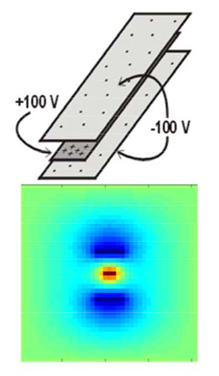

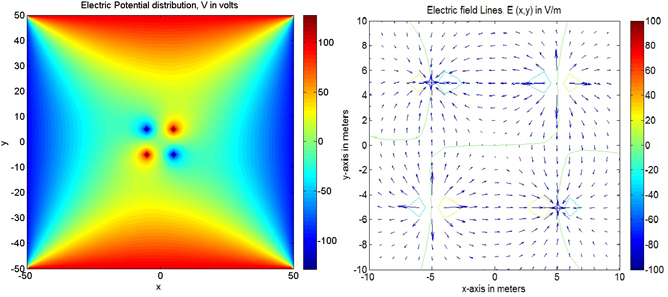

## 3. Ändra storlek på simulerade ytan
## 4. Implementera konvergenskriterium i koden
## 5. Testa andra sätt att rita skalär fält och vektor fält i Python

---

In [19]:
def elektroder(V):
    V[25:75, 20] = -100
    V[40:60, 50] = 100
    V[25:75, 80] = -100

def randD(V,Nx,Ny):
    V[0,:] = 0
    V[Nx-1,:] = 0
    V[:,0] = 0
    V[:,Ny-1] = 0

def randN(V,Nx,Ny):
    V[0,:] = V[1,:]
    V[Nx-1,:] = V[Nx-2,:]              
    V[:,0] = V[:,1]
    V[:,Ny-1] = V[:,Ny-2]

In [22]:
Nx = 100
Ny = 100
V = np.zeros( (Nx,Ny) ) # förberedder tom rutnät

# loop
count = 0
while True:
    V_old = V.copy()
    for x in range(1,Nx-1) :
        for y in range(1,Ny-1) :
            V[x,y] = ( V[x-1,y] + V[x,y-1] + V[x,y+1] + V[x+1,y] )/4
    elektroder(V)
    randD(V,Nx,Ny)
    
    count += 1

    if abs(V_old-V).mean() < (10**-6) and count > 10:
        break

print(count)

(Ex, Ey) = np.gradient(-V)
Emag = np.sqrt(Ex**2 + Ey**2)

3369


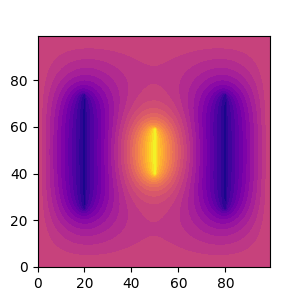

In [23]:
X, Y = np.meshgrid(np.arange(Ny), np.arange(Nx))
fig, ax = plt.subplots(figsize=(3,3))
ax.contourf(X, Y, V, 30, cmap='plasma')

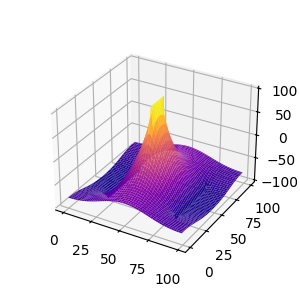

In [ ]:
fig1, ax1 = plt.subplots(figsize=(3,3),subplot_kw=dict(projection='3d'))
ax1.plot_surface(X, Y, V, cmap='plasma')

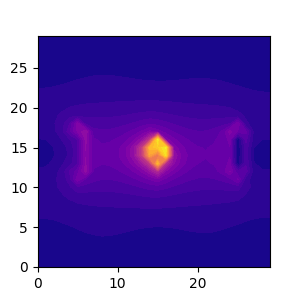

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
ax.contourf(X, Y, Emag, 30, cmap='plasma')

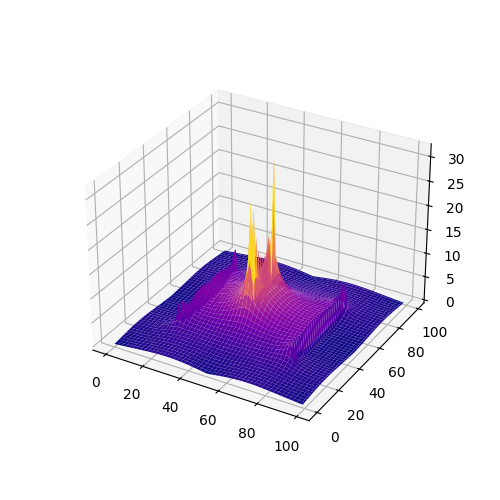

In [ ]:
# fält styrka 
fig2, ax2 = plt.subplots(figsize=(5,5),subplot_kw=dict(projection='3d'))
ax2.plot_surface(X, Y, Emag, cmap='plasma')

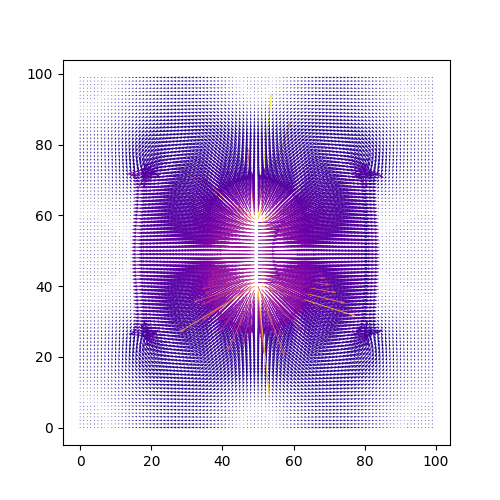

In [ ]:
fig3, ax3 = plt.subplots(figsize = (5,5))
ax3.quiver(X, Y, Ey, Ex, Emag, scale=100, cmap='plasma')